I'm a big fan of coffee, but I also know that Starbucks drinks tend to have a lot of sugar in them. Which Starbucks drinks should I order if I don't want to have a lot of sugar?

Let's start by loading in our data & calling the libraries we'll need.

In [1]:
# libraries we'll need
library(tidyverse)
library(ggplot2)

# read in our data & take a peek at it
drinks <- as_data_frame(read.csv("../input/starbucks_drinkMenu_expanded.csv"))
head(drinks)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


Beverage_category,Beverage,Beverage_prep,Calories,Total.Fat..g.,Trans.Fat..g.,Saturated.Fat..g.,Sodium..mg.,Total.Carbohydrates..g.,Cholesterol..mg.,Dietary.Fibre..g.,Sugars..g.,Protein..g.,Vitamin.A....DV.,Vitamin.C....DV.,Calcium....DV.,Iron....DV.,Caffeine..mg.
Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
Classic Espresso Drinks,Caffè Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10%,0%,20%,0%,75


Now let's get a general idea of the distribution of sugar in drinks.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


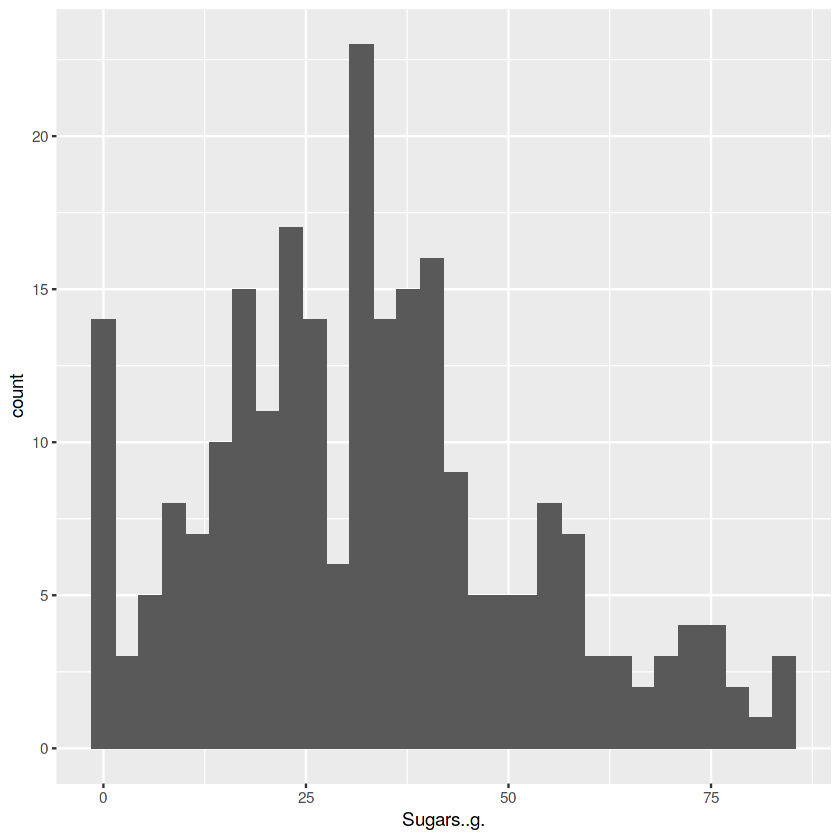

In [2]:
# plot a histogram of the amount of sugar in drinks 
ggplot(drinks, aes(Sugars..g.)) + geom_histogram()

 That's quite a bit of sugar! The FDA recommends no more than 50 grams of sugar per day, but the World Health Organization suggests limiting sugar intake to 25 grams a day, according to [this article](http://www.refinery29.com/2015/11/97444/fda-sugar-recommendation). 
 
Which drinks are the biggest offenders?

In [3]:
# get the drinks with more than 75 grams of sugar
filter(drinks, Sugars..g. > 75) 

Beverage_category,Beverage,Beverage_prep,Calories,Total.Fat..g.,Trans.Fat..g.,Saturated.Fat..g.,Sodium..mg.,Total.Carbohydrates..g.,Cholesterol..mg.,Dietary.Fibre..g.,Sugars..g.,Protein..g.,Vitamin.A....DV.,Vitamin.C....DV.,Calcium....DV.,Iron....DV.,Caffeine..mg.
Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Venti,360,0,0.0,0.0,0,25,89,0,83,0,0%,0%,0%,0%,0
Frappuccino® Blended Coffee,Mocha (Without Whipped Cream),Venti Nonfat Milk,340,1,0.5,0.0,5,300,80,1,76,7,10%,0%,15%,10%,140
Frappuccino® Blended Coffee,Mocha (Without Whipped Cream),Whole Milk,390,6,3.5,0.1,15,300,80,1,76,6,8%,0%,15%,10%,140
Frappuccino® Blended Coffee,Caramel (Without Whipped Cream),Venti Nonfat Milk,330,0.1,0.1,0.0,5,290,78,0,77,5,10%,0%,15%,2%,130
Frappuccino® Blended Coffee,Caramel (Without Whipped Cream),Whole Milk,370,5,3.0,0.1,15,300,78,0,77,5,8%,0%,15%,2%,130
Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5,4.0,0.0,5,340,90,2,84,7,10%,0%,20%,35%,145
Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10,7.0,0.2,15,340,90,2,84,7,6%,0%,15%,35%,145
Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Soymilk,430,8,4.5,0.0,0,330,88,3,80,6,6%,0%,20%,40%,145


 Looks like you should avoid Frappuccinos and the Caramel Apple Spice if you're worried about sugar. 
 
But sugar's not the only nutrient on the table. What if I want a drink with fewer than 25 grams of sugar, but also a lot of protein?

In [4]:
# get drinks with fewer than 25 grams of sugar but more than 5 grams of protein
filter(drinks, Sugars..g. < 25) %>% filter(Protein..g. > 5) %>% summary()

                   Beverage_category                                  Beverage 
 Classic Espresso Drinks    :30      Caffè Latte                          :11  
 Signature Espresso Drinks  : 8      Cappuccino                           : 8  
 Tazo® Tea Drinks           : 1      Caramel Macchiato                    : 5  
 Coffee                     : 0      Caffè Mocha (Without Whipped Cream)  : 4  
 Frappuccino® Blended Coffee: 0      Skinny Latte (Any Flavour)           : 4  
 Frappuccino® Blended Crème : 0      Hot Chocolate (Without Whipped Cream): 3  
 (Other)                    : 0      (Other)                              : 4  
            Beverage_prep    Calories   Total.Fat..g. Trans.Fat..g.  
 Soymilk           :12    Min.   : 60   3.5    : 6    Min.   :0.100  
 2% Milk           :11    1st Qu.:100   0.1    : 4    1st Qu.:0.200  
 Short Nonfat Milk : 6    Median :130   0.2    : 4    Median :0.500  
 Tall Nonfat Milk  : 4    Mean   :131   4.5    : 4    Mean   :1.095  
 Grande No

So, if you're looking for a low sugar, high protein coffee, stick with the classic expresso drinks, especially Latte's and Cappachinos, and maybe consider subbing in soymilk.

One last question: are sugary drinks also higher in calories?

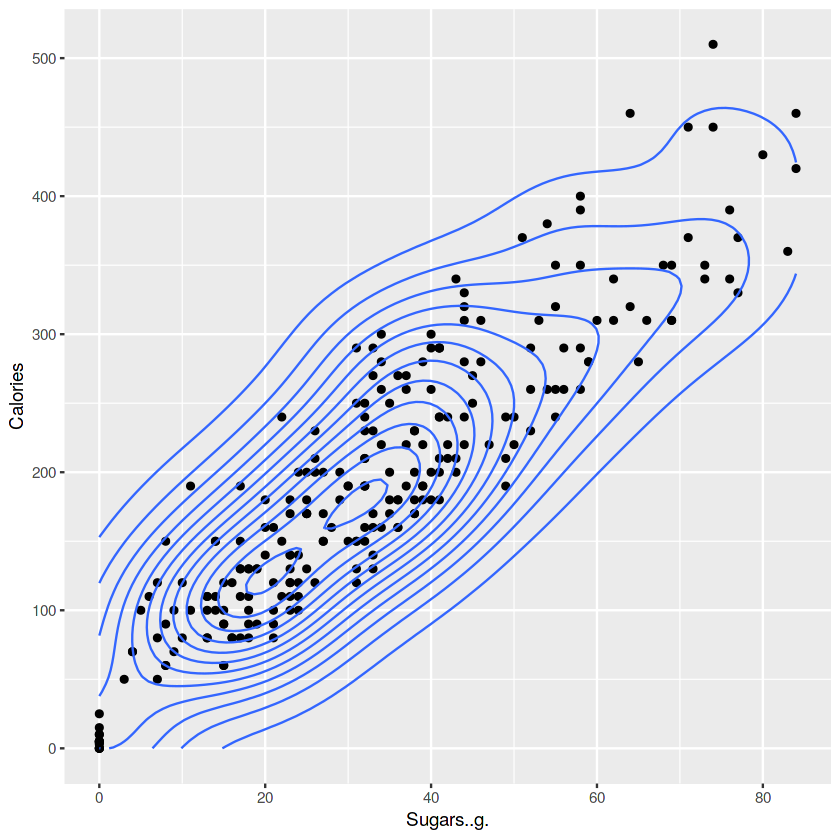

In [5]:
# plot calories & sugar together
ggplot(drinks, aes(x = Sugars..g., y =  Calories)) + geom_point() + geom_density_2d()

Yep! Unsurpringly, drinks with more sugar are also higher in calories.